In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import random as rnd
import os
import math

# required for interactive plotting
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import numpy.polynomial as np_poly

from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML

from pprint import pprint
import functools as ft

import re

initialization
$
\newcommand{\Brace}[1]{\left\{#1\right\}}
\newcommand{\Bracket}[1]{\left[#1\right]}
\newcommand{\cases}[1]{\begin{cases}#1\end{cases}}
\newcommand{\cov}[1]{\text{cov} \sigma\left[#1\right]}
\newcommand{\diff}[2]{\frac{d #1}{d #2}}
\newcommand{\difftwo}[2]{\frac{d^2 #1}{d {#2}^2}}
\newcommand{\diffn}[2]{{#1}^{\prime}(#2)}
\newcommand{\ds}{\displaystyle}
\newcommand{\E}[1]{\mathbb{E}\left[ #1 \right]}
\newcommand{\expb}[1]{\exp\left\{#1\right\}} 
\newcommand{\EXP}[1]{\exp\left\{#1\right\}} 
\newcommand{\frachalf}[1]{\frac{#1}{2}~}
\newcommand{\fracone}[1]{\frac{1}{#1}~}
\newcommand{\fracrec}[1]{\frac{1}{#1}~}
\newcommand{\half}{\fracone{2}}
\newcommand{\H}[1]{\mathbb{H}\left[#1\right]}
\newcommand{\Int}[2]{\displaystyle \int_{#1}^{#2}~}
\newcommand{\intinfinf}{\Int{-\infty}{\infty}}
\newcommand{\inv}[1]{#1^{-1}}
\newcommand{\invp}[1]{\left({#1}\right)^{-1}}
\newcommand{\KL}[2]{\text{KL}\left(#1 \Vert #2\right)}
\newcommand{\Lim}[1]{\displaystyle \lim_{#1}}
\newcommand{\Ln}[1]{\ln \left\(#1\right\)}
\newcommand{\Lnb}[1]{\ln \left\{#1\right\} }
\newcommand{\Mod}[1]{\left|#1\right|}
\newcommand{\Norm}[1]{\left\lVert #1 \right\rVert}
\newcommand{\Normsqr}[1]{\Norm{#1}^2}
\newcommand{\map}[1]{#1_{\text{MAP}}}
\newcommand{\ml}[1]{#1_{\text{ML}}}
\newcommand{\MI}[1]{\mathcal{I}\left(#1\right)}
\newcommand{\P}{\mathbb{P}}
\newcommand{\Paran}[1]{\left(#1\right)}
\newcommand{\Partial}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\sqrbrkt}[1]{\Bracket{#1}^2}
\newcommand{\sqrbrc}[1]{\Brace{#1}^2}
\newcommand{\trace}[1]{\text{Tr}\left( #1 \right)}
\newcommand{\traceb}[1]{\text{Tr}\left\{#1\right\}}
\newcommand{\underl}[1]{\text{$\underline{#1}$}}
\newcommand{\V}[1]{\mathbb{V}\left[#1\right]}
$
$
\DeclareMathOperator*{\argmin}{arg\,min}
\DeclareMathOperator*{\argmax}{arg\,max}
$
$
\newcommand{\mat}[1]{ \left[ \begin{matrix} #1 \end{matrix} \right] }
\newcommand{\matp}[1]{ \left( \begin{matrix} #1 \end{matrix} \right)}
\newcommand{\mats}[1]{ \begin{matrix}#1\end{matrix} }
\newcommand{\arrthree}[1]{
\begin{array}{rlr} #1 \end{array}}
$

$
\newcommand{\C}{\mathbb{C}}
\newcommand{\Ca}{\mathcal{C}}
\newcommand{\Caone}{\Ca_1}
\newcommand{\Catwo}{\Ca_2}
\newcommand{\Cak}{\Ca_k}
\newcommand{\D}{\mathcal{D}}
\newcommand{\G}{\mathcal{G}}
\newcommand{\I}{\mathcal{I}}
\newcommand{\L}{\mathcal{L}}
\newcommand{\M}{\mathcal{M}}
\newcommand{\N}{\mathbb{N}}
\newcommand{\R}{\mathbb{R}}
\newcommand{\Ra}{\mathcal{R}}
$
$
\newcommand{\commentgray}[1]{\color{gray}{\text{#1}}}
$

sum, product
$
\newcommand{\sumi}{\displaystyle \sum_i}
\newcommand{\sumiD}{\displaystyle \sum_{i=1}^{D}}
\newcommand{\sumiL}{\displaystyle \sum_{i=1}^{L}}
\newcommand{\sumiN}{\displaystyle \sum_{i=1}^{N}}
\newcommand{\sumjD}{\displaystyle \sum_{j=1}^{D}}
\newcommand{\sumjK}{\displaystyle \sum_{j=1}^{K}}
\newcommand{\sumjMl}{\sum_{j=1}^{M-1}}
\newcommand{\sumkK}{\displaystyle \sum_{k=1}^{K}}
\newcommand{\sumkM}{\displaystyle \sum_{k=1}^{M}}
\newcommand{\sumkMl}{\sum_{k=1}^{M-1}}
\newcommand{\sumkp}{\displaystyle \sum_{k=1}^{p}}
\newcommand{\summN}{\displaystyle \sum_{m=1}^{N}}
\newcommand{\sumnN}{\displaystyle \sum_{n=1}^{N}}
$
$
\newcommand{\prodi}{\displaystyle \prod_i}
\newcommand{\prodiD}{\displaystyle \prod_{i=1}^{D}}
\newcommand{\prodiL}{\displaystyle \prod_{i=1}^{L}}
\newcommand{\prodiN}{\displaystyle \prod_{i=1}^{N}}
\newcommand{\prodjK}{\displaystyle \prod_{j=1}^{K}}
\newcommand{\prodkK}{\displaystyle \prod_{k=1}^{K}}
\newcommand{\prodmN}{\displaystyle \prod_{m=1}^{N}}
\newcommand{\prodnN}{\displaystyle \prod_{n=1}^{N}}
$

alphabet shortcuts
$
\newcommand{\ab}{\mathbf{a}}
\newcommand{\at}{\ab^T}
\newcommand{\Ab}{\mathbf{A}}
\newcommand{\At}{\Ab^T}
\newcommand{\Ai}{\inv{\Ab}}
\newcommand{\Abjk}{\Ab_{jk}}
\newcommand{\bb}{\mathbf{b}}
\newcommand{\bt}{\bb^T}
\newcommand{\Bb}{\mathbf{B}}
\newcommand{\Bt}{\Bb^T}
\newcommand{\Cb}{\mathbf{C}}
\newcommand{\Cn}{\Cb_{N}}
\newcommand{\Db}{\mathbf{D}}
\newcommand{\fb}{\mathbf{f}}
\newcommand{\fp}{f^{\prime}}
\newcommand{\Hb}{\mathbf{H}}
\newcommand{\hx}{h(\xb)}
\newcommand{\Jb}{\mathbf{J}}
\newcommand{\kb}{\mathbf{k}}
\newcommand{\kt}{\kb^T}
\newcommand{\Kb}{\mathbf{K}}
\newcommand{\Lb}{\mathbf{L}}
\newcommand{\Lt}{\Lb^T}
\newcommand{\Lbi}{\Lb^{-1}}
\newcommand{\mb}{\mathbf{m}}
\newcommand{\mt}{\mb^T}
\newcommand{\mbn}{\mb_N}
\newcommand{\mbnt}{\mbn^T}
\newcommand{\mbN}{\mb_N}
\newcommand{\mbNt}{\mbn^T}
\newcommand{\Mb}{\mathbf{M}}
\newcommand{\Qb}{\mathbf{Q}}
\newcommand{\Rb}{\mathbf{R}}
\newcommand{\sb}{\mathbf{s}}
\newcommand{\Sb}{\mathbf{S}}
\newcommand{\tb}{\mathbf{t}}
\newcommand{\tbnn}{\tb_{N}}
\newcommand{\tbnp}{\tb_{N+1}}
\newcommand{\tt}{\tb^T}
\newcommand{\Tb}{\mathbf{T}}
\newcommand{\Tt}{\Tb^T}
\newcommand{\ub}{\mathbf{u}}
\newcommand{\Ub}{\mathbf{U}}
\newcommand{\Ut}{\Ub^T}
\newcommand{\vb}{\mathbf{v}}
\newcommand{\Vb}{\mathbf{V}}
\newcommand{\wb}{\mathbf{w}}
\newcommand{\wnr}[1]{\wb^{(\text{#1})}}
\newcommand{\wt}{\wb^T}
\newcommand{\Wb}{\mathbf{W}}
\newcommand{\Wt}{\Wb^T}
\newcommand{\Wtilde}{\widetilde{\Wb}}
\newcommand{\Wtildet}{\Wtilde^T}
\newcommand{\Xb}{\mathbf{X}}
\newcommand{\Xt}{\Xb^T}
\newcommand{\Xk}{\Xb_k}
\newcommand{\Xkt}{\Xk^T}
\newcommand{\Xtilde}{\widetilde{\Xb}}
\newcommand{\Xtildet}{\Xtilde^T}
\newcommand{\xb}{\mathbf{x}}
\newcommand{\xt}{\xb^T}
\newcommand{\xtilde}{\widetilde{\xb}}
\newcommand{\xtilden}{\xtilde_n}
\newcommand{\xtildent}{\xtilden^T}
\newcommand{\xp}{x^{\prime}}
\newcommand{\xbp}{\xb^{\prime}}
\newcommand{\xbm}{\xb_m}
\newcommand{\xbn}{\xb_n}
\newcommand{\xbnp}{\xb_{N+1}}
\newcommand{\xab}{\mathbf{x_a}}
\newcommand{\xabt}{\mathbf{x_a}^T}
\newcommand{\xbb}{\mathbf{x_b}}
\newcommand{\xbbt}{\mathbf{x_b}^T}
\newcommand{\yb}{\mathbf{y}}
\newcommand{\yt}{\yb^T}
\newcommand{\yx}{y(\xb)}
\newcommand{\Yb}{\mathbf{Y}}
\newcommand{\Yt}{\Yb^T}
\newcommand{\zb}{\mathbf{z}}
\newcommand{\zt}{\zb^T}
\newcommand{\zbm}{\zb_m}
\newcommand{\zbn}{\zb_n}
\newcommand{\zbnp}{\zb_{n-1}}
\newcommand{\znk}{\zb_{nk}}
\newcommand{\znpj}{\zb_{n-1,j}}
\newcommand{\Zb}{\mathbf{Z}}
$

math shortcuts
$
\newcommand{\alphab}{\pmb{\alpha}}
\newcommand{\alphabt}{\alphab^T}
\newcommand{\betab}{\pmb{\beta}}
\newcommand{\betabp}{\betab^{\prime}}
\newcommand{\chib}{\boldsymbol{\chi}}
\newcommand{\etab}{\pmb{\eta}}
\newcommand{\etabp}{\etab^{\prime}}
\newcommand{\etat}{\eta^T}
\newcommand{\etabt}{\etab^T}
\newcommand{\Lambdab}{\pmb{\Lambda}}
\newcommand{\laa}{\Lambda_{aa}}
\newcommand{\laai}{\Lambda_{aa}^{-1}}
\newcommand{\lab}{\Lambda_{ab}}
\newcommand{\lba}{\Lambda_{ba}}
\newcommand{\lbb}{\Lambda_{bb}}
\newcommand{\lbbi}{\Lambda_{bb}^{-1}}
\newcommand{\li}{\Lambda^{-1}}
\newcommand{\Li}{\Lambda^{-1}}
\newcommand{\mub}{\pmb{\mu}}
\newcommand{\mut}{\mub^T}
\newcommand{\muab}{\pmb{\mu}_a}
\newcommand{\mubb}{\pmb{\mu}_b}
\newcommand{\Phib}{\pmb{\Phi}}
\newcommand{\Phibt}{\Phib^T}
\newcommand{\pib}{\pmb{\pi}}
\newcommand{\sigmasqr}{\sigma^2}
\newcommand{\saa}{\Sigma_{aa}}
\newcommand{\sab}{\Sigma_{ab}}
\newcommand{\sba}{\Sigma_{ba}}
\newcommand{\sbb}{\Sigma_{bb}}
\newcommand{\Sigmai}{\inv{\Sigma}}
\newcommand{\thetab}{\pmb{\theta}}
\newcommand{\thetat}{\thetab^T}
\newcommand{\thetabh}{\hat{\thetab}}
\newcommand{\thetaold}{\thetab^{\text{old}}}
$
$
\newcommand{\zerob}{\pmb{0}}
\newcommand{\oneb}{\pmb{1}}
\newcommand{\ed}{\mathbb{E}_{\D}}
\newcommand{\edyx}{\ed\left[y(\xb ; \D)\right]}
\newcommand{\dx}{~dx}
\newcommand{\dxb}{~d\xb}
\newcommand{\pxdxb}{p(\xb) \dxb}
\newcommand{\dwb}{~d\wb}
$

aliases for distributions
$\newcommand{\multivarcoeff}{\frac{1}{(2\pi)^{D/2}}
\frac{1}{\left| \mathbf{\Sigma}\right|^{1/2}}}$
$\newcommand{\multivarexp}[2]
{
\left\{
 -\frac{1}{2} 
 {#1}^T 
 #2
 {#1}
\right\}
}$
$\newcommand{\multivarexpx}[1]{\multivarexp{#1}{\Sigma^{-1}}}$
$\newcommand{\multivarexpstd}{\multivarexpx{(\xb-\mub)}}$
$\newcommand{\gam}{\operatorname{Gam}}$
$
\newcommand{\Nl}[3]{\mathcal{N}\left(#1 \mid #2, #3\right)}
\newcommand{\Nstdx}{\Nl{\mathbf{x}}{\mathbf{\mu}}{\Sigma}}
$

In [2]:
from graphviz import Digraph

// The Round Table
digraph {
	A [label="King Arthur"]
	B [label="Sir Bedevere the Wise"]
	L [label="Sir Lancelot the Brave"]
	A -> B
	A -> L
	B -> L [constraint=false]
}


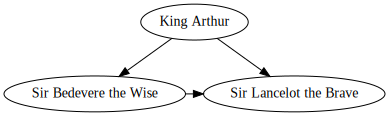

In [13]:
dot = Digraph(comment='The Round Table')

dot.node('A', 'King Arthur')
dot.node('B', 'Sir Bedevere the Wise')
dot.node('L', 'Sir Lancelot the Brave')

dot.edges(['AB', 'AL'])
dot.edge('B', 'L', constraint='false')
print(dot.source) 
#dot.render('test-output/round-table.gv', view=True)
dot

In [14]:
import graphviz as gv

In [16]:
g1 = gv.Graph()
adj_list = {
    0: [8],
    1: [2,3,4],
    2: [1,3,5],
    3: [1,2,4,5,6,7],
    4: [1,3,5],
    5: [2,3,4,6,7,8],
    6: [3,5,7],
    7: [3,5,6],
    8: [0,9],
    9: [8],
}
y = [[g1.edge(str(x),str(yy)) for yy in y if yy>x] for x,y in adj_list.items()]
# uncomment the below line to see the graph
# g1

In [17]:
g2 = gv.Graph()
adj_list = {
    'a': ['g', 'e', 'd'],
    'b': ['e', 'c', 'f'],
    'c': ['f', 'b', 'e'],
    'd': ['a', 'e', 'f'],
    'e': ['a', 'g', 'c', 'f', 'b', 'd'],
    'f': ['c', 'g', 'e', 'b', 'h'],
    'g': ['a', 'f', 'e'],
    'h': ['f', 'i', 'j'],
    'i': ['h'],
    'j': ['h'],
}
y = [[g2.edge(str(x),str(yy)) for yy in y if yy>x] for x,y in adj_list.items()]
#g2

In [18]:
g2?

In [19]:
class Permutation:
    def __init__(self, n, str_permutation=None):
        self.n = n
        self.arr = [ix for ix in range(self.n)]
        if (str_permutation is not None):
            self.parse(str_permutation)
    def add_block_str(self, str_block):
        self.add(self.parse_block(str_block))
    def add(self, block):
        for x,y in zip(block, block[1:] + block[0:1]):
            self.arr[x] = y
    def parse(self, string):
        str_blocks = self.simple_scanner(string, re.compile(r'\[(.*?)\]'))
        blocks = [self.parse_block(str_block) for str_block in str_blocks]
        [self.add(block) for block in blocks]
    def simple_scanner(self, string, regex):
        match = regex.match(string)
        if match is None:
            return []
        ix_end = match.span()[1]
        return [match.groups()[0]] + self.simple_scanner(string[ix_end:], regex)
    def parse_block(self, str_block):
        return [int(i.strip()) for i in str_block.split(",")]
    def print(self, other_format=False):
        if other_format:
            print(self.str_cyclical())
        else:
            print(self.arr)
    def str_cyclical(self):
        visited = [False for _ in range(self.n)]
        elements_all = []
        for ix in range(self.n):
            if visited[ix]:
                continue
            elements_current = self.str_cyclical_helper(visited, ix)
            if len(elements_current)>1:
                elements_all += [elements_current]
        if len(elements_all)>0:
            str_out = "{0}".format("".join([str(e) for e in elements_all]))
        else:
            str_out = 'I'
        return str_out
    def str_cyclical_helper(self, visited, ix):
        visited[ix] = True
        elements = [ix]
        if visited[self.arr[ix]]:
            return elements
        return elements + self.str_cyclical_helper(visited, self.arr[ix])
    def __getitem__(self, ix):
        return self.arr[ix]
    def __setitem__(self, key, value):
        self.arr[key] = value
    def __mul__(self, other):
        perm = Permutation(self.n)
        perm.arr = [self.arr[other.arr[ix]] for ix in range(self.n)]
        return perm
    def __eq__(self, other):
        return self.arr == other.arr
    def inv(self):
        perm_inv = Permutation(self.n)
        for ix in range(self.n):
            perm_inv[self[ix]] = ix
        return perm_inv
perm1 = Permutation(8, "[0,4,6,7,3,1][2,5]")
perm2 = Permutation(8, "[0,1,3,7,6,4][2,5]")
perm3 = Permutation(8, "[0,1,3,7,6,4][2,5]")
perm1.print(True)
perm2.print(True)
perm3.print(True)
print(perm1 == perm2)
print(perm2 == perm3)
print(perm3 == perm1)
perm1i = perm1.inv()
perm1i.print(True)

[0, 4, 6, 7, 3, 1][2, 5]
[0, 1, 3, 7, 6, 4][2, 5]
[0, 1, 3, 7, 6, 4][2, 5]
False
True
False
[0, 1, 3, 7, 6, 4][2, 5]


In [20]:
class Group:
    def __init__(self, n):
        self.permutations = []
        self.n = n
    def add(self, permutation):
        self.permutations.append(permutation)
    def has(self, perm1):
        for perm in self.permutations:
            if(perm==perm1):
                return True
        return False
    def print(self, other_format=False):
        for perm in self.permutations:
            perm.print(other_format)

In [21]:
def closure(N, generators, g=None):
    def add_to_new(g, new, f):
        if(not(g.has(f)) and (f not in new)):
            new.append(f)
        return new
    
    if g is None:
        g = Group(N)
        new = [Permutation(N)]
    else:
        new = g.permutations
        
    while(len(new) != 0):
        [g.add(perm) for perm in new if not(g.has(perm))]
        last = new
        new = []
        for gen in generators:
            for h in last:
                add_to_new(g, new, h*gen)
                add_to_new(g, new, gen*h)
    print(len(g.permutations))
    return g

N = 8
generators = []
generators.append(Permutation(N, "[0,1,3,7,6,4][2,5]"))
generators.append(Permutation(N, "[0,1,3,2][4,5,7,6]"))
#[gen.print(True) for gen in generators]
group = closure(N, generators)

48


In [22]:
N, generators = 8, []
generators.append(Permutation(N, "[1,3]"))
generators.append(Permutation(N, "[2,4][5,6]"))
group = closure(N, generators)
[perm.print(True) for perm in group.permutations]


# generators = [Permutation(N, "[0,2][6,7]")]
# group = closure(N, generators)
# [perm.print(True) for perm in group.permutations]



4
I
[1, 3]
[2, 4][5, 6]
[1, 3][2, 4][5, 6]


[None, None, None, None]

In [23]:
generators = [Permutation(N, "[0,2][6,7]")]
group = closure(N, generators, group)
[perm.print(True) for perm in group.permutations]

12
I
[1, 3]
[2, 4][5, 6]
[1, 3][2, 4][5, 6]
[0, 2][6, 7]
[0, 2][1, 3][6, 7]
[0, 4, 2][5, 6, 7]
[0, 2, 4][5, 7, 6]
[0, 4, 2][1, 3][5, 6, 7]
[0, 2, 4][1, 3][5, 7, 6]
[0, 4][5, 7]
[0, 4][1, 3][5, 7]


[None, None, None, None, None, None, None, None, None, None, None, None]